In [42]:
#modules
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [43]:
# reading the data
eeg_data = pd.read_csv("eeg_data.csv")
behavioral_data = pd.read_csv("Dots_30_006_trial_info.csv")

bpath = r'./'  # modify path according to the path on your computer

# The .npy data comes from the PCA analysis
frontal_lobe = np.load(bpath + r'pca_data_frontal_lobe.npy')     
occipital_lobe = np.load(bpath + r'pca_data_occipital_lobe.npy')
temporal_left_lobe = np.load(bpath + r'pca_data_temporal_left_lobe.npy')
temporal_right_lobe = np.load(bpath + r'pca_data_temporal_right_lobe.npy')
central_lobe = np.load(bpath + r'pca_data_central_lobe.npy')

In [44]:
# Prepare data for clustering   STEP 1 preprocessing    
# standardize data
frontal_lobe_norm = (frontal_lobe - np.mean(frontal_lobe)) / np.std(frontal_lobe)
occipital_lobe_norm = (occipital_lobe - np.mean(occipital_lobe)) / np.std(occipital_lobe)
temporal_left_lobe_norm = (temporal_left_lobe - np.mean(temporal_left_lobe)) / np.std(temporal_left_lobe)
temporal_right_lobe_norm = (temporal_right_lobe - np.mean(temporal_right_lobe)) / np.std(temporal_right_lobe)
central_lobe_norm = (central_lobe - np.mean(central_lobe)) / np.std(central_lobe)

# Stack all arrays vertically
data = np.vstack([frontal_lobe, occipital_lobe, temporal_left_lobe, temporal_right_lobe, central_lobe])  # we use vstack due to having more than 2 arrays (1 array per brain region)

# saving the initial data to display when plotting
data = data.copy()

In [45]:
# define clustering analyses    STEP 2
#kmeans = KMeans(n_clusters=len(np.unique(central_lobe)))    # I used central_lobe but all 5 lobes data arrays has the same length so any can be used
dbscan = DBSCAN()
"""
Nothe that we used K-Means, but we could have used DBSCAN or AgglomerativeClustering

dbscan = DBSCAN()
agglo  = AgglomerativeClustering(n_clusters=len(np.unique(gt)))
"""

'\nNothe that we used K-Means, but we could have used DBSCAN or AgglomerativeClustering\n\ndbscan = DBSCAN()\nagglo  = AgglomerativeClustering(n_clusters=len(np.unique(gt)))\n'

In [46]:
# Run clustering analyses   STEP 3
dbscan.fit(data)

"""
Note that we used K-Means, but we could have used DBSCAN or AgglomerativeClustering

dbscan.fit(data)
agglo.fit(data)
"""

'\nNote that we used K-Means, but we could have used DBSCAN or AgglomerativeClustering\n\ndbscan.fit(data)\nagglo.fit(data)\n'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


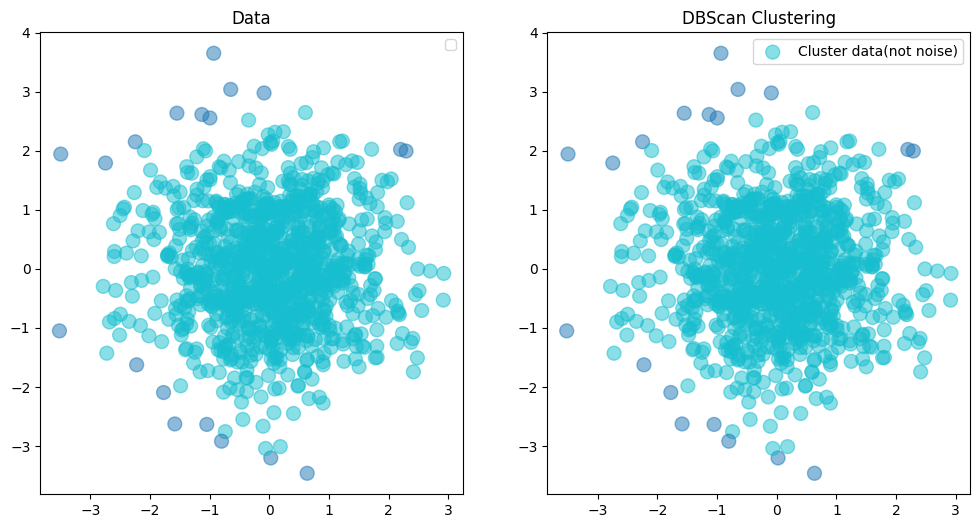

[[ 3.51359979e-01  1.61789383e+00]
 [-9.44502619e-01  2.04479017e-01]
 [-2.26659355e-01 -1.44759694e+00]
 [ 1.16400658e-01  1.31088313e-01]
 [-9.33611727e-01 -4.17659397e-01]
 [ 1.32831251e+00 -1.51420038e-01]
 [ 4.37878587e-01 -2.94001387e-01]
 [ 8.51592065e-01 -4.51842981e-01]
 [ 1.49036825e+00  1.73715557e-01]
 [ 1.03228768e+00 -1.33089128e+00]
 [-2.54774149e-01 -4.55892393e-01]
 [-8.39234964e-01  1.48743288e-01]
 [-5.70663438e-01 -1.19141413e-01]
 [-1.83352720e-01  2.09852422e-01]
 [ 1.05286101e+00  1.62323610e+00]
 [-1.37289168e+00  1.63212072e+00]
 [-1.32490610e-01  3.71556304e-01]
 [-1.14160775e+00  6.38957374e-01]
 [ 1.50168631e+00 -1.65841824e+00]
 [-2.75813145e-01  1.67498287e-01]
 [ 6.67622204e-01  1.85211946e-01]
 [-1.43535281e+00  1.03884471e+00]
 [-1.68683042e-01  1.42906873e+00]
 [-5.35133459e-01 -2.04687818e+00]
 [ 9.76823679e-01  1.59504096e+00]
 [ 1.69502562e+00 -2.84150325e-01]
 [-8.24619919e-01  6.68431942e-01]
 [ 2.53839466e-01  1.02518494e+00]
 [ 4.01878551e-01 -1

In [50]:
# get labels and plot   STEP 4
#kmeans_labels = kmeans.labels_
labels = dbscan.labels_
"""
Note that we used K-Means, but we could have used DBSCAN or AgglomerativeClustering

dbscan_labels = dbscan.labels_
agglo_labels  = agglo.labels_
"""

# Plotting the data
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot ground truth - initial data from PCA
ax[0].scatter(data[:, 0], data[:, 1], c=labels, cmap='tab10', s=100, alpha=0.5)
ax[0].set_title('Data')
ax[0].legend()


# Plot the clusters with K-means labels
ax[1].scatter(data[:, 0], data[:, 1], c=labels, cmap='tab10', s=100, alpha=0.5, label="Cluster data(not noise)")
ax[1].set_title('DBScan Clustering')
ax[1].legend()

# Show the plots
plt.show()
print(central_lobe)

/tmp/ipykernel_31544/4006991904.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[0].scatter(data[:, 0], data[:, 1], c='blue', cmap='tab10', s=100, alpha=0.5)


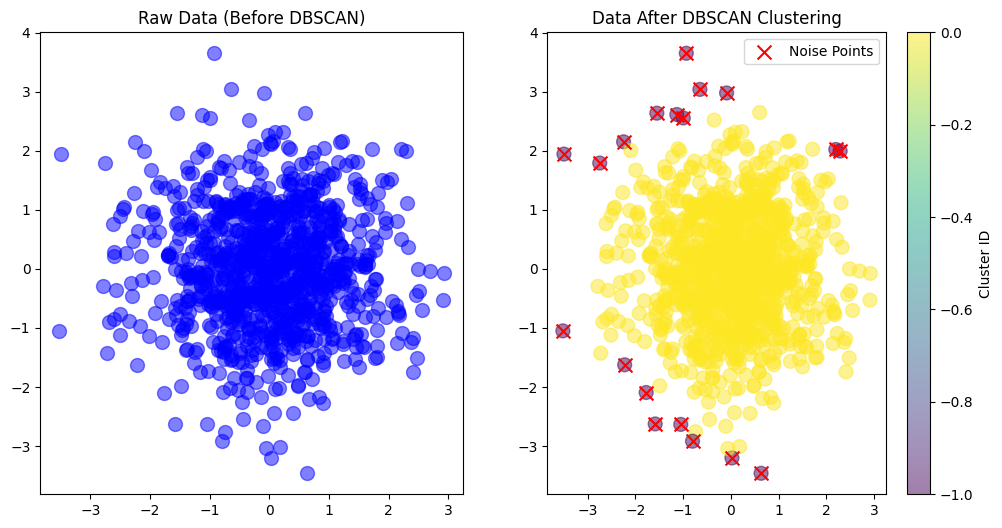

In [48]:
# Plotting the data
labels = dbscan.labels_  # The cluster labels from DBSCAN

# DBSCAN assigns -1 to noise points, so we can use this information
noise_points = labels == -1 

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot ground truth (data before DBSCAN, no labels)
ax[0].scatter(data[:, 0], data[:, 1], c='blue', cmap='tab10', s=100, alpha=0.5)
ax[0].set_title('Raw Data (Before DBSCAN)')

# Plot the clusters with DBSCAN labels (data after DBSCAN) 
scatter = ax[1].scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=100, alpha=0.5) # viridis is just the colormap ; c=labels refers to the colors and label is the assigned variable

# Mark noise points with a different color (e.g., red 'x' for noise points)
ax[1].scatter(data[noise_points, 0], data[noise_points, 1], c='red', marker='x', s=100, label='Noise Points')

# Title and legend for the second plot
ax[1].set_title('Data After DBSCAN Clustering')
ax[1].legend()

# Show color bar for the clusters
plt.colorbar(scatter, ax=ax[1], label="Cluster ID")

# Show the plots
plt.show()